In [1]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('C:/Users/Vipul k Dhiman/Desktop')
os.getcwd()

'C:\\Users\\Vipul k Dhiman\\Desktop'

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train = DataFrame.drop_duplicates(train) #Remove Duplicates

In [5]:
train.isnull().sum() #Missing value check

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

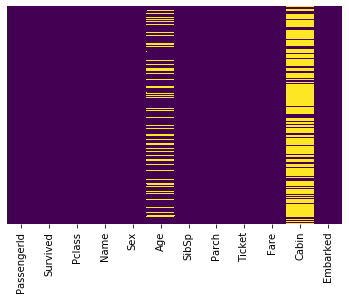

In [6]:
#Exploratory Data Analysis
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

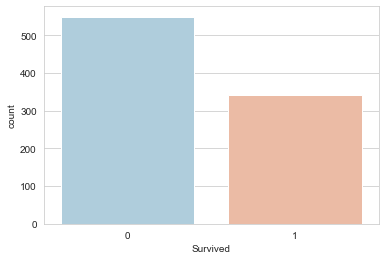

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

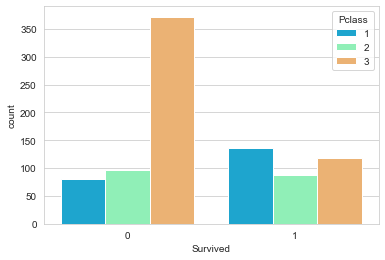

In [8]:
# Survived as per Class
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

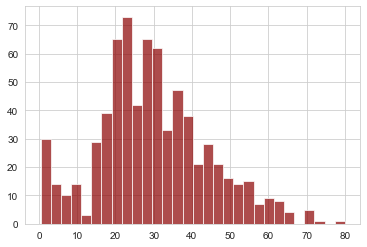

In [9]:
# Age distribution among the population
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

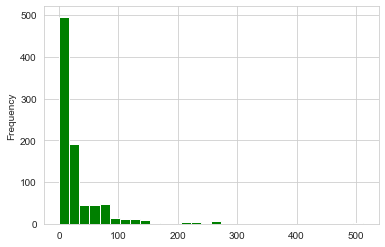

In [10]:
# Fare Distribution
train['Fare'].plot(kind='hist',bins=30,color='green')

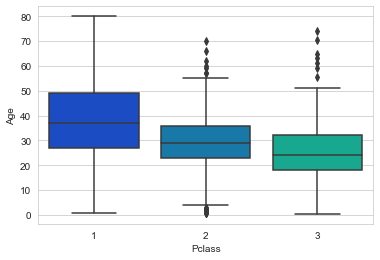

In [11]:
# Box-Plot
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

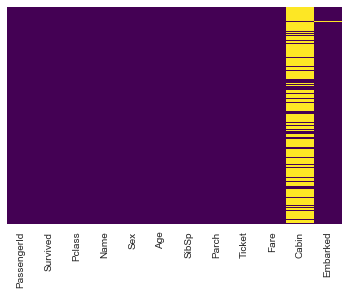

In [12]:
# Imputing Missing Values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Removing Columns will all missing values
train.drop('Cabin',axis=1,inplace=True)

In [14]:
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [16]:
# Dummy variables
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [18]:
train = pd.concat([train,sex,embark],axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
#Correlation check
Corr_Var = train.corr()

In [21]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(train.drop('Survived', axis = 1), train["Survived"], test_size = 0.25, random_state = 123)

In [22]:
Train_X.shape

(666, 9)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols_to_drop_vif = []

for i in range(Train_X.shape[1]-1):
    temp_vif = variance_inflation_factor(Train_X.values, i)
    print(Train_X.columns[i],": ", temp_vif)
    if temp_vif>10:
        print('Since the value of VIF is greater than 10 so dropping this Column', Train_X.columns[i])
        cols_to_drop_vif.append(Train_X.columns[i])
        
Train_X = Train_X.drop(cols_to_drop_vif, axis = 1)
Test_X = Test_X.drop(cols_to_drop_vif, axis = 1)

PassengerId :  3.682201648573121
Pclass :  6.947067533971796
Age :  4.627201828604577
SibSp :  1.5954964950719013
Parch :  1.6710630802857283
Fare :  1.6964256022290933
male :  3.1448568371522065
Q :  1.586333249414863


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Train_X)
scaled_data = scaler.transform(Train_X)

In [25]:
# MODEL Building
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression(max_iter=1500)
logmodel.fit(Train_X,Train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Prediction
predictions = logmodel.predict(Test_X)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       134
           1       0.77      0.62      0.69        89

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.77       223



In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Test_Y,predictions))

[[118  16]
 [ 34  55]]
